In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Least squares and linear basis functions models
## Least squares

In [2]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    ttx = np.transpose(tx)
    A = np.dot(ttx,tx)
    b = np.dot(ttx,y)
    w = np.linalg.solve(A,b)
    e = y - tx.dot(w)
    mse = e.dot(e) / (2 * len(e))
    return w,mse

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    w,mse = least_squares(y, tx)
    return w,mse

test_your_least_squares()

(array([ 73.293922  ,  13.47971243]), 15.385887868829403)

## Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [4]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [5]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    c_x = np.c_[x]
    phi = np.c_[np.ones(x.shape)]
    for i in range(degree+1):
        phi = np.c_[phi,np.c_[phi[:,i]]*c_x]
    return phi

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

Processing 1th experiment, degree=1, rmse=0.4669819689544141
Processing 2th experiment, degree=3, rmse=0.2557143165202269
Processing 3th experiment, degree=7, rmse=0.24918263364592297
Processing 4th experiment, degree=12, rmse=0.24128982214845787


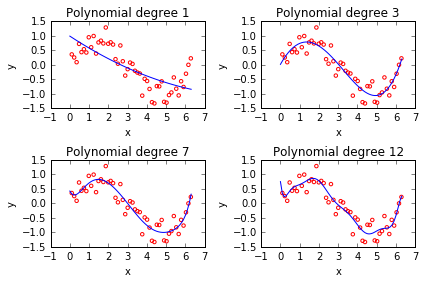

In [6]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):

        phi = build_poly(x,degree)

        weight,mse = least_squares(y, phi)
        
        rmse = np.sqrt(2*mse)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weight, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()


polynomial_regression()

# Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [7]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    # ***************************************************
    tr_len = np.floor(x.shape[0]*ratio).astype(int)
    train_idx = np.random.choice(range(x.shape[0]),tr_len, replace=False)
    test_idx = np.delete(range(x.shape[0]),train_idx)
    # ***************************************************
    return train_idx,test_idx

split_data(x, y, 0.9)

(array([27, 35, 40, 38,  2,  3, 48, 29, 46, 31, 32, 39, 21, 36, 19, 42, 49,
        26, 22, 13, 41, 17, 45, 24, 23,  4, 33, 14, 30, 10, 28, 44, 34, 18,
        20, 25,  6,  7, 47,  1, 16,  0, 15,  5, 11]),
 array([ 8,  9, 12, 37, 43]))

Then, test your `split_data` function below.

In [8]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    tr_idx,te_idx = split_data(x, y, ratio, seed)
    tr_x = x[tr_idx]
    te_x = x[te_idx]
    tr_y = y[tr_idx]
    te_y = y[te_idx]
    # ***************************************************
    tr_phi = build_poly(tr_x, degree)
    te_phi = build_poly(te_x, degree)
    # ***************************************************
    weight,mse = least_squares(tr_y, tr_phi)       
    rmse = np.sqrt(2*mse)
    # ***************************************************
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    rmse_tr = rmse
    e = te_y - np.dot(te_phi,weight)
    mse = e.dot(e) / (2 * len(e))
    rmse_te = np.sqrt(2*mse)
    # ***************************************************
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.487, Testing RMSE=0.211
proportion=0.9, degree=3, Training RMSE=0.261, Testing RMSE=0.213
proportion=0.9, degree=7, Training RMSE=0.253, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=0.243, Testing RMSE=0.255
proportion=0.5, degree=1, Training RMSE=0.451, Testing RMSE=0.565
proportion=0.5, degree=3, Training RMSE=0.237, Testing RMSE=0.290
proportion=0.5, degree=7, Training RMSE=0.230, Testing RMSE=0.328
proportion=0.5, degree=12, Training RMSE=0.209, Testing RMSE=3.642
proportion=0.1, degree=1, Training RMSE=0.279, Testing RMSE=0.686
proportion=0.1, degree=3, Training RMSE=0.000, Testing RMSE=4.709
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=2.112
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=2.622


# Ridge Regression
Please fill in the function below.

In [9]:
def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    ttx = np.transpose(tx)
    A = np.dot(ttx,tx) + lamb*np.eye(tx.shape[1])
    b = np.dot(ttx,y)
    w = np.linalg.solve(A,b)
    e = y - tx.dot(w)
    mse = e.dot(e) / (2 * len(e))
    return w,mse

In [10]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    tr_idx,te_idx = split_data(x, y, ratio, seed)
    tr_x = x[tr_idx]
    te_x = x[te_idx]
    tr_y = y[tr_idx]
    te_y = y[te_idx]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    tr_phi = build_poly(tr_x, degree)
    te_phi = build_poly(te_x, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression with different lambda: TODO
    # ***************************************************
    for lamb in lambdas:
        weight,mse = ridge_regression(tr_y, tr_phi, lamb)
        rmse_tr = np.sqrt(2*mse)
        e = te_y - np.dot(te_phi,weight)
        mse = e.dot(e) / (2 * len(e))
        rmse_te = np.sqrt(2*mse)        
        print("lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
              l=lamb, tr=rmse_tr, te=rmse_te))
seed = 6
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)

lambda=0.001, Training RMSE=0.231, Testing RMSE=0.300
lambda=0.003, Training RMSE=0.232, Testing RMSE=0.295
lambda=0.008, Training RMSE=0.232, Testing RMSE=0.293
lambda=0.022, Training RMSE=0.232, Testing RMSE=0.291
lambda=0.060, Training RMSE=0.232, Testing RMSE=0.290
lambda=0.167, Training RMSE=0.233, Testing RMSE=0.293
lambda=0.464, Training RMSE=0.234, Testing RMSE=0.299
lambda=1.292, Training RMSE=0.238, Testing RMSE=0.308
lambda=3.594, Training RMSE=0.247, Testing RMSE=0.311
lambda=10.000, Training RMSE=0.269, Testing RMSE=0.294
